# Inferential Statistics Ia - Frequentism

## I An introduction to sampling from the Normal distribution

First, let's explore the ways we can generate the Normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work.

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

In [2]:
norm?

__A:__ <p style="color:blue">The second listed method is pdf which returns the probability density function</p>

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__

In [3]:
seed(47)
# draw five samples here

draw_5= norm.rvs(size=5)
print(draw_5)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

__A:__

In [4]:
# Calculate and print the mean here, hint: use np.mean()
mean_draw_5= np.mean(draw_5)
print(mean_draw_5)

0.19355593334131074


__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [5]:
std_draw_5= np.sqrt(np.sum((draw_5 - mean_draw_5)**2)/len(draw_5))
print(std_draw_5)

0.9606195639478641


Here we have calculated the actual standard deviation of a small (size 5) data set. But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die. In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [6]:
samplestd_draw_5= np.sqrt(np.sum((draw_5 - mean_draw_5)**2)/(len(draw_5)-1))
print(samplestd_draw_5)

1.0740053227518152


__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__

In [7]:
np_std_draw_5= np.std(draw_5)
print(np_std_draw_5)

0.9606195639478641


We return our population standard deviation

__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [8]:
np.std?

In [9]:
npsample_std_draw_5= np.std(draw_5,ddof=1)
print(npsample_std_draw_5)

1.0740053227518152


## II Sampling distributions

Let's give our normal distribution a little flavor. Also, for didactic purposes, the standard normal distribution, with its variance equal to its standard deviation of one, would not be a great illustration of a key point. Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [10]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

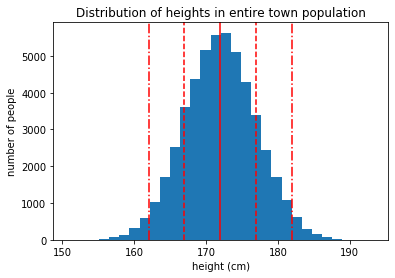

In [11]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [12]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [13]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

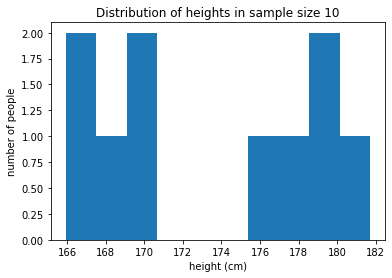

In [14]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?

In [15]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [16]:
daily_sample2 = townsfolk_sampler(10)

In [17]:
np.mean(daily_sample2)

173.7317666636263

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

In [18]:
seed(47)
# take your samples here
daily_365_sample=np.empty(365)
for i in range(365):
    daily_365_sample[i]=np.mean(townsfolk_sampler(10))

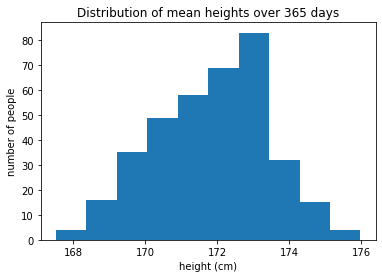

In [19]:
_ = plt.hist(daily_365_sample, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of mean heights over 365 days')

__Q:__ Verify the above results from the CLT.

__A:__

In [20]:
print(np.mean(pop_heights))
print(np.mean(daily_365_sample))

172.0192602425845
171.8660049358649


In [21]:
print(np.std(daily_365_sample))

1.5756704135286475


__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__

In [22]:
seed(47)
# calculate daily means from the larger sample size here
daily_365_sample_50=np.empty(365)
for i in range(365):
    daily_365_sample_50[i]=np.mean(townsfolk_sampler(50))

171.94366080916114
0.6736107539771146


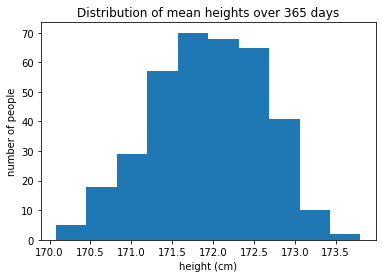

In [23]:
_ = plt.hist(daily_365_sample_50, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of mean heights over 365 days')

print(np.mean(daily_365_sample_50))
print(np.std(daily_365_sample_50))

### III Normally testing times!

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__

<p style="color:blue">0.68/2 + 0.50 = 0.84</p>

Or 

<p style="color:blue">Z = 1, p(x<=1) = 0.8413</p>

Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [24]:
norm.cdf(1)

0.8413447460685429

__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__

<p style="color:blue">Z = (177-172)/5 = 1</p>

<p style="color:blue">Similar distribution to Standard Normal calculated above.
p(x<=177) = 0.8413</p>

In [25]:
norm.cdf(177,172,5)

0.8413447460685429

__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__
Very surprised

In [26]:
1 - norm.cdf(200,172,5)

1.0717590259723409e-08

__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

__A:__

In [27]:
seed(47)
# take your sample now
sample50 = townsfolk_sampler(50)

In [28]:
mean50 = np.mean(sample50)
print(mean50)

172.7815108576788


In [29]:
popstd_mean50 = np.std(sample50,ddof=1)
print(popstd_mean50)

4.195424364433547


In [30]:
##Two tail
zcrit_val25= norm.ppf(.025, 0, 1)
margin_25 = zcrit_val25 * popstd_mean50/np.sqrt(len(sample50))
print(margin_25)

##Two Tail
zcrit_val975= norm.ppf(.975, 0, 1)
margin_975 =zcrit_val975 * popstd_mean50/np.sqrt(len(sample50))
print(margin_975)

-1.162890934287654
1.1628909342876539


In [31]:
print(mean50-margin_975, mean50+margin_975)

171.61861992339115 173.94440179196644


<p style="color:blue">The interval includes the true mean</p>

__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__
<p style="color:blue">The problem with calculating the confidence interval using the critical z value is that our distribution is not normally distributed. The requirement that we are failining is that our sample size should be a bit larger.</p>

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__

In [32]:
df= len(sample50) -1
t_crit25= t.ppf(0.025,df,0,1)
print(t_crit25)

-2.0095752344892093 2.009575234489209


In [33]:
std_err= popstd_mean50/ np.sqrt(len(sample50))

In [34]:
me=std_err*t_crit975
print(std_err*t_crit25, std_err*t_crit975)

-1.1923264102757956 1.1923264102757953


In [35]:
print(mean50-me, mean50+me)

171.589184447403 173.9738372679546


<p style="color:blue">This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.</p>

# Inferential Statistics Ib - Frequentism

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

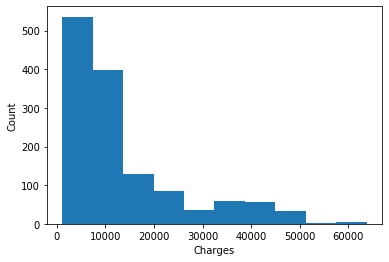

Mean = 13270.422265141257
Standard deviation = 12105.484975561605


In [4]:
plt.hist(medical['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

print('Mean = ' + str(np.mean(medical['charges'])))
print('Standard deviation = '  + str(np.std(medical['charges'])))

<p style="color:blue">The distribution is highly skewed with a high variance.</p>

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

<p style="color:blue">The most appropriate frequentist test to apply would be the Student's t-test.</p>

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__

<p style="color:blue">The approptiate confidence interval for this test is a high confidence interval such as 95%, the interval should be one-sided.</p?

In [5]:
charges= medical['charges']
df = len(charges-1)
crit_val05 =  t.ppf(0.05,df,0,1)
print(crit_val05)

-1.6459932615808077


In [6]:
mean_charges = np.mean(charges)
std_charges = np.std(charges, ddof=1)
err= std_charges/np.sqrt(len(charges))
me= crit_val05*err
print(mean_charges+me)

12725.487466208931


<p style="color:blue">We are 95% confident that the mean of the charges is greater than $12725; therefore, the administrator should not be concerned.</p>

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__


<p style="color:blue">\begin{equation}H_0: \bar{x}_0 = \bar{x}_1 \end{equation}</p>
<p style="color:blue">\begin{equation}H_1:  \bar{x}_0 \neq \bar{x}_1 \end{equation}</p>
<p style="color:blue">We are assuming the variances of the two groups are the same.</p>

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [7]:
charges_ins = medical['charges'][medical['insuranceclaim']==1]
charges_not = medical['charges'][medical['insuranceclaim']==0]
n0=len(charges_not)
n1=len(charges_ins)
s0=np.std(charges_not, ddof=1)
s1=np.std(charges_ins, ddof=1)
x0_bar=np.mean(charges_not)
x1_bar=np.mean(charges_ins)

In [8]:
sp=np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2)/(n0+n1 - 2))
print(sp)

11520.034268775256


In [9]:
t_stat = (x0_bar - x1_bar)/(sp*np.sqrt(1/n0+1/n1))
print(t_stat)

-11.89329903087671


In [10]:
p_val= 2*t.cdf(t_stat, df= n0+n1-2)
print(p_val)

4.461230231620972e-31


In [11]:
from scipy.stats import ttest_ind
ttest_ind(charges_not, charges_ins)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [12]:
ttest_ind(charges_not, charges_ins, equal_var=0)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
<p style="color:blue">There does not appear to be an equivalent function in scipy.stats to perform a z-test from a sample. We would have to use the functions to compute the Z score then from there compute the p value</p>